## Parte 1: Cargar y Limpiar el Dataset
- Importar librerias y paquetes
- Limpiar data de caracteres no alfabéticos, numeros y letras especiales
- Convertir los datos a minusculas
- Excluir palabras con menos de 2 letras
- Eliminar filas con valores nulos
- Impresion primeros 10 resultados

In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Función mejorada para limpiar los mensajes 
def clean_message(message):
    # Eliminar caracteres especiales y números
    message = message.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ').replace('û', "").replace('ï', "").replace('å', "").replace('ô', "").replace('ì', '')
    message = re.sub(r'[^a-zA-Z\s]', '', message)  # Reemplazar caracteres no alfabéticos y números por espacios
    message = re.sub(r'[^\w\s]', '', message)  # Quitar puntuación
    message = re.sub(r'\d+', '', message)  # Quitar números
    message = message.lower()  # Convertir a minúsculas
    
    # Tokenización
    words = word_tokenize(message)
    
    # Excluir palabras de longitud <= 2
    words = [word for word in words if len(word) > 2]
    
    return ' '.join(words)

# Cargar y limpiar el dataset
file_path = r'C:\Users\yazam\OneDrive\Desktop\Files\Universidad Andres Bello\Taller IA Aplicada\aicc103_s8_base\aicc103_s8_base\spam.csv' # Ruta del archivo reemplazar por ruta local r'C:...'
dataset_cleaned = pd.read_csv(file_path, sep=";", encoding='latin-1')
dataset_cleaned = dataset_cleaned.iloc[:, :2]  # Conservar solo las dos primeras columnas relevantes
dataset_cleaned.columns = ["label", "message"]  # Renombrar columnas para mayor claridad
dataset_cleaned = dataset_cleaned.dropna(subset=['message']) #Eliminar filas con valores nulos
dataset_cleaned['message'] = dataset_cleaned['message'].apply(clean_message)
print(dataset_cleaned.head(10))  # Verifica que los datos se cargaron correctamente



  label                                            message
0   ham  until jurong point crazy available only bugis ...
1   ham                                 lar joking wif oni
2  spam  free entry wkly comp win cup final tkts may te...
3   ham                 dun say early hor already then say
4   ham   nah dont think goes usf lives around here though
5  spam  freemsg hey there darling its been weeks now a...
6   ham  even brother not like speak with they treat li...
7   ham  per your request melle melle oru minnaminungin...
8  spam  winner valued network customer you have been s...
9  spam  had your mobile months more entitled update th...


## Parte 2: Vectorización y Modelo Naive Bayes

- Definir el vectorizado
- Intentar nuevamente procesar el texto y construir el modelo Naive-Bayes
- Dividir los datos en conjuntos de entrenamiento y prueba
- Evaluar el modelo
- Impresion de métricas
- Impresion de matriz de confusion

In [103]:
# Vectorización
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(dataset_cleaned['message'])
y = (dataset_cleaned['label'] == 'spam').astype(int)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo Naive-Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir métricas
print(f'Accuracy: {accuracy}')
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))



Accuracy: 0.9685534591194969

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       965
           1       0.83      0.96      0.89       148

    accuracy                           0.97      1113
   macro avg       0.91      0.96      0.94      1113
weighted avg       0.97      0.97      0.97      1113



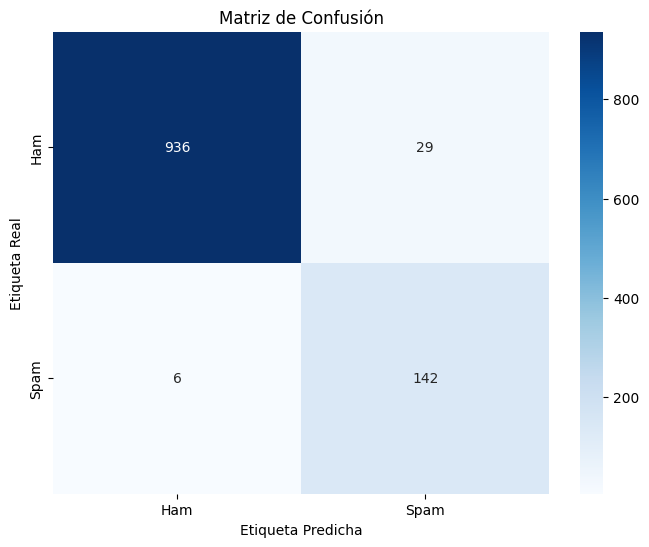

In [104]:
# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Matriz de Confusión")
plt.ylabel("Etiqueta Real")
plt.xlabel("Etiqueta Predicha")
plt.show()

## Parte 3: Análisis de Frecuencias y Gráficos
- Vectorizar todo el conjunto de datos nuevamente
- Obtener frecuencias totales de las palabras para spam y no spam
- Crear dataframes de frecuencias
- Imprimir palabras de baja frecuencia

In [105]:
# Identificar palabras de baja frecuencia
vectorizer_combined = CountVectorizer(stop_words='english')
X_combined = vectorizer_combined.fit_transform(dataset_cleaned['message'])

spam_indices = dataset_cleaned['label'] == 'spam'
ham_indices = dataset_cleaned['label'] == 'ham'

spam_word_counts = X_combined[spam_indices].sum(axis=0).A1
ham_word_counts = X_combined[ham_indices].sum(axis=0).A1
combined_words = vectorizer_combined.get_feature_names_out()

# Crear DataFrame para análisis
word_freq = pd.DataFrame({
    'word': combined_words,
    'spam_count': spam_word_counts,
    'ham_count': ham_word_counts
})

# Filtrar palabras de baja frecuencia
low_freq_words = word_freq[(word_freq['spam_count'] < 3) & (word_freq['ham_count'] < 3)]
print("Palabras de baja frecuencia (excluidas):")
print(low_freq_words)



Palabras de baja frecuencia (excluidas):
             word  spam_count  ham_count
1     aaooooright           0          1
4           abbey           0          1
5         abdomen           0          1
6            abeg           0          1
7        aberdeen           1          0
...           ...         ...        ...
7723          zoe           1          1
7724    zogtorius           0          1
7725         zoom           0          1
7726         zouk           1          0
7727        zyada           0          1

[5606 rows x 3 columns]


## Continuacion Parte 3 
- Seleccionar las 10 palabras más frecuentes para cada clase
- No se han excluido palabras duplicadas ya que se considera que la frecuencia de aparición de una palabra en un mensaje es relevante
- Graficar las palabras más frecuentes

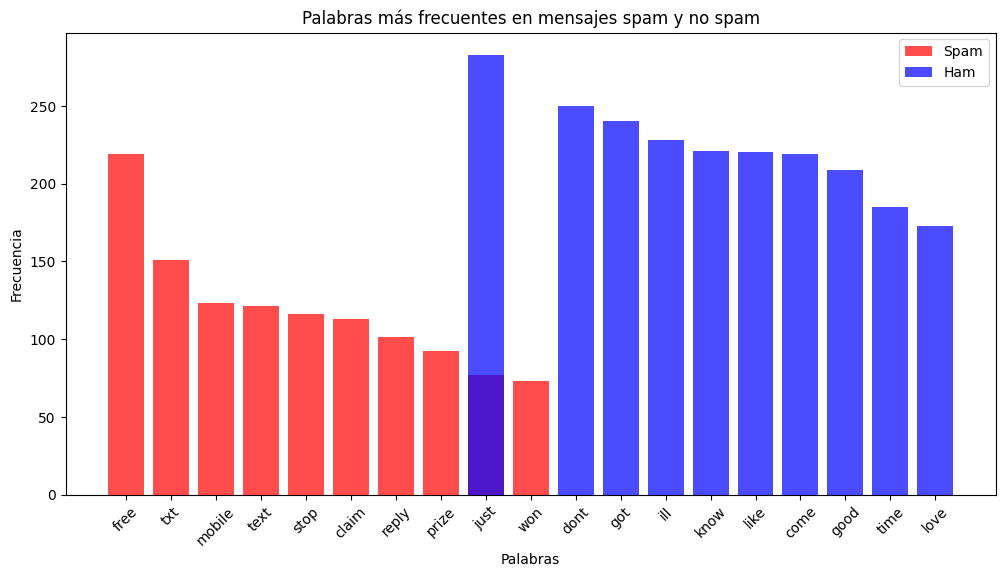

In [106]:

# Graficar palabras más frecuentes
spam_freq = word_freq[word_freq['spam_count'] >= 3].sort_values(by='spam_count', ascending=False).head(10)
ham_freq = word_freq[word_freq['ham_count'] >= 3].sort_values(by='ham_count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(spam_freq['word'], spam_freq['spam_count'], color='red', alpha=0.7, label='Spam')
plt.bar(ham_freq['word'], ham_freq['ham_count'], color='blue', alpha=0.7, label='Ham')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Palabras más frecuentes en mensajes spam y no spam')
plt.legend()
plt.xticks(rotation=45)
plt.show()
